In [1]:
import  mglearn
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=100)

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

In [6]:
line.shape

(1000, 1)

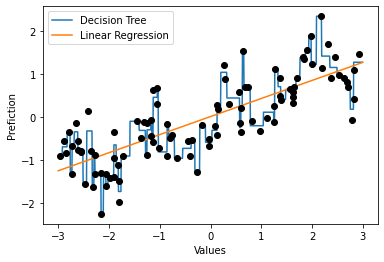

In [7]:
dec = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,dec.predict(line),label="Decision Tree")


lin = LinearRegression().fit(X,y)
plt.plot(line,lin.predict(line),label = 'Linear Regression')

plt.xlabel('Values')
plt.ylabel('Prefiction')
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')

In [8]:
bins = np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [9]:
which_bin =  np.digitize(X,bins=bins)

In [10]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [11]:
which_bin[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]])

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
encoder = OneHotEncoder(sparse=False)

In [14]:
encoder.fit(which_bin)
X_bins = encoder.transform(which_bin)

In [15]:
X_bins[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
X_bins.shape

(100, 10)

In [17]:
line_binned = encoder.transform(np.digitize(line,bins=bins))

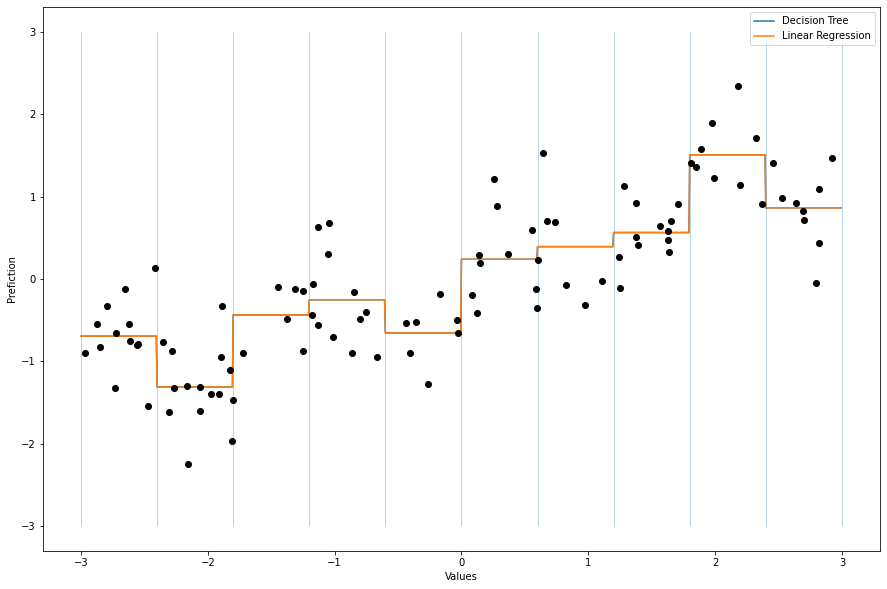

In [18]:
plt.figure(figsize=(15,10))
dec = DecisionTreeRegressor(min_samples_split=3).fit(X_bins,y)
plt.plot(line,dec.predict(line_binned),label="Decision Tree")


lin = LinearRegression().fit(X_bins,y)
plt.plot(line,lin.predict(line_binned),label = 'Linear Regression')


plt.xlabel('Values')
plt.ylabel('Prefiction')
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')
plt.vlines(bins,-3,3,linewidth=1,alpha=0.3)

In [19]:
X_combined = np.hstack([X,X_bins])
X_combined.shape

(100, 11)

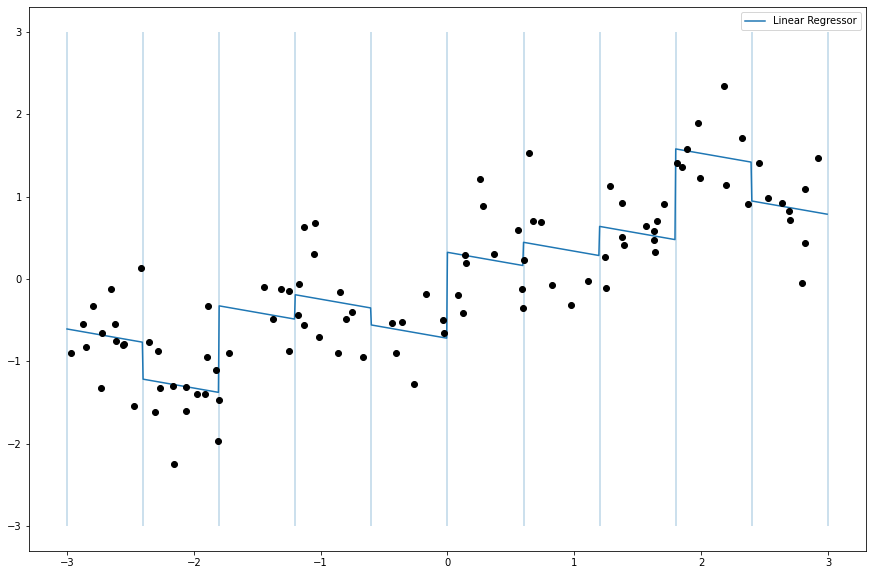

In [20]:
plt.figure(figsize=(15,10))
lreg = LinearRegression().fit(X_combined,y)
line_combined = np.hstack([line,line_binned])
plt.plot(line,lreg.predict(line_combined),label='Linear Regressor')
plt.vlines(bins,-3,3,linewidth=1.5,alpha=0.3)
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')

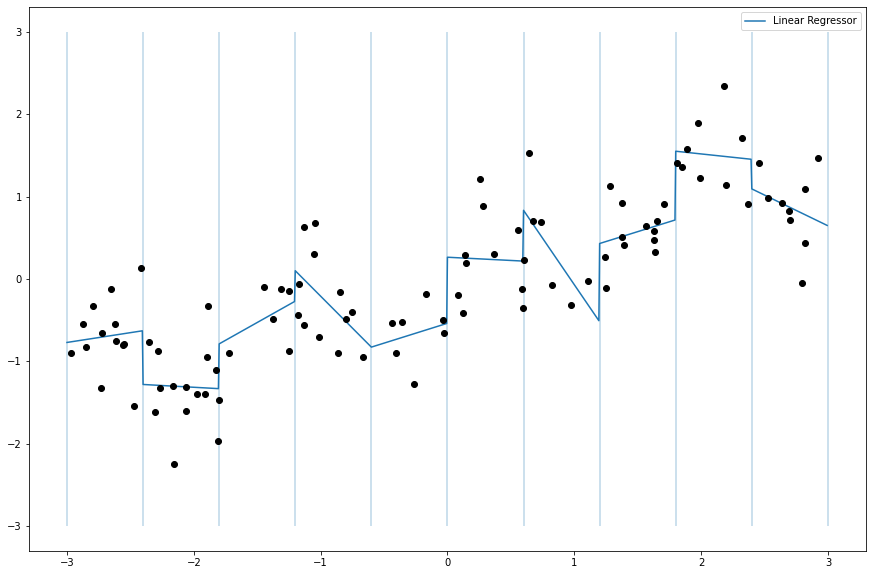

In [21]:
plt.figure(figsize=(15,10))
X_product = np.hstack([X_bins,X*X_bins])
lreg = LinearRegression().fit(X_product,y)
line_combined = np.hstack([line_binned,line*line_binned])
plt.plot(line,lreg.predict(line_combined),label='Linear Regressor')
plt.vlines(bins,-3,3,linewidth=1.5,alpha=0.3)
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [24]:
X_poly.shape

(100, 10)

In [25]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

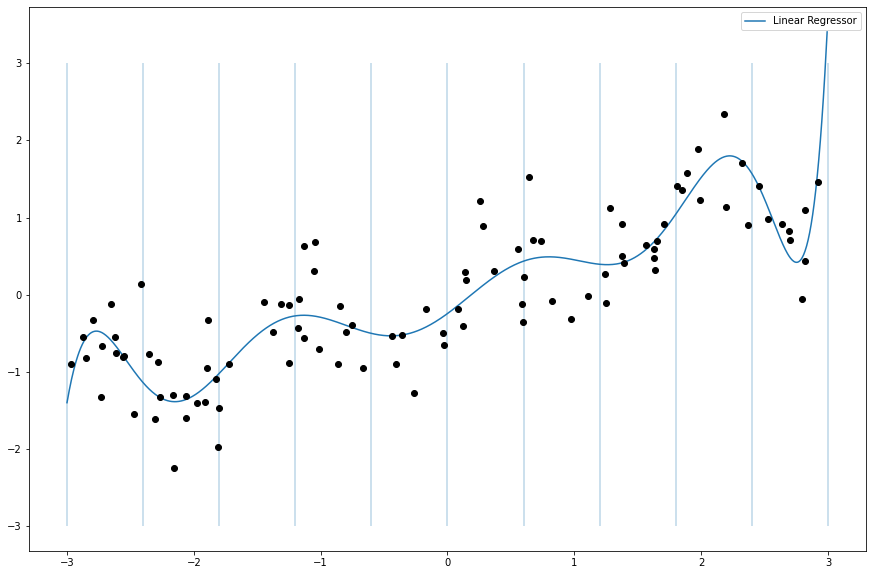

In [26]:
plt.figure(figsize=(15,10))
# X_product = np.hstack([X_bins,X*X_bins])
lreg = LinearRegression().fit(X_poly,y)
#line_combined = np.hstack([line_binned,line*line_binned])
line_transform = poly.transform(line)
plt.plot(line,lreg.predict(line_transform),label='Linear Regressor')
plt.vlines(bins,-3,3,linewidth=1.5,alpha=0.3)
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')

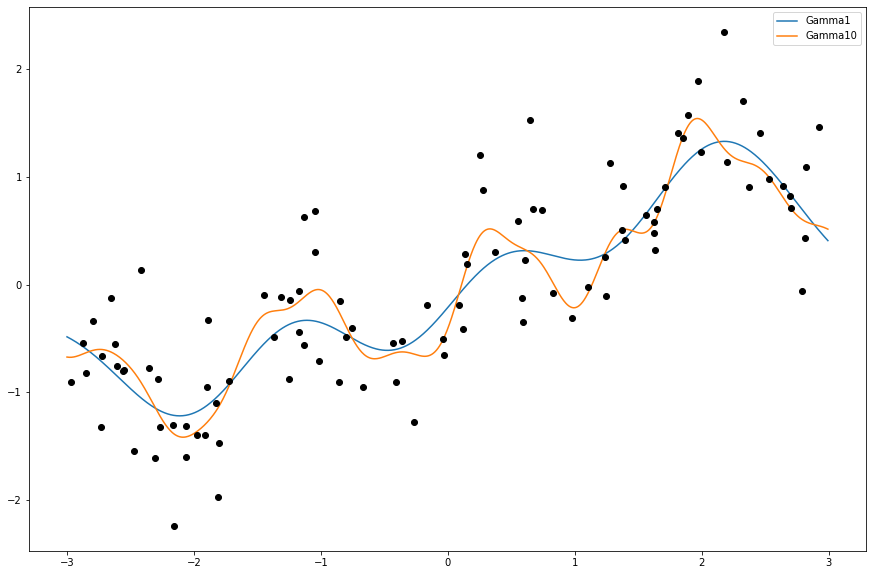

In [27]:
from sklearn.svm import SVR
plt.figure(figsize=(15,10))
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='Gamma{}'.format(gamma))

plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')

In [28]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [29]:
boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

In [30]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_p = scaler.transform(X_train)
X_test_p = scaler.transform(X_test)

In [31]:
poly = PolynomialFeatures(degree=2).fit(X_train_p)
X_train_poly = poly.transform(X_train_p)
X_test_poly =  poly.transform(X_test_p)

In [32]:
print(X_train.shape)
print(X_train_poly.shape)

(379, 13)
(379, 105)


In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridg = Ridge().fit(X_train_p,y_train)
ridg.score(X_test_p,y_test)

0.6214583227921031

In [35]:
ridg = Ridge().fit(X_train_poly,y_train)
ridg.score(X_test_poly,y_test)

0.7534782020980573

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_p,y_train)
rf.score(X_test_p,y_test)

0.7860123696374766

In [38]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
rf.score(X_test_poly,y_test)

0.7534716956848198

# Non Linear Transformation 

In [41]:
rnd  = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

In [42]:
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org,w)

In [43]:
w

array([ 1.59327362,  0.5687224 , -0.11448705])

In [46]:
np.bincount(X[:,0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1])

Text(0, 0.5, 'Count')

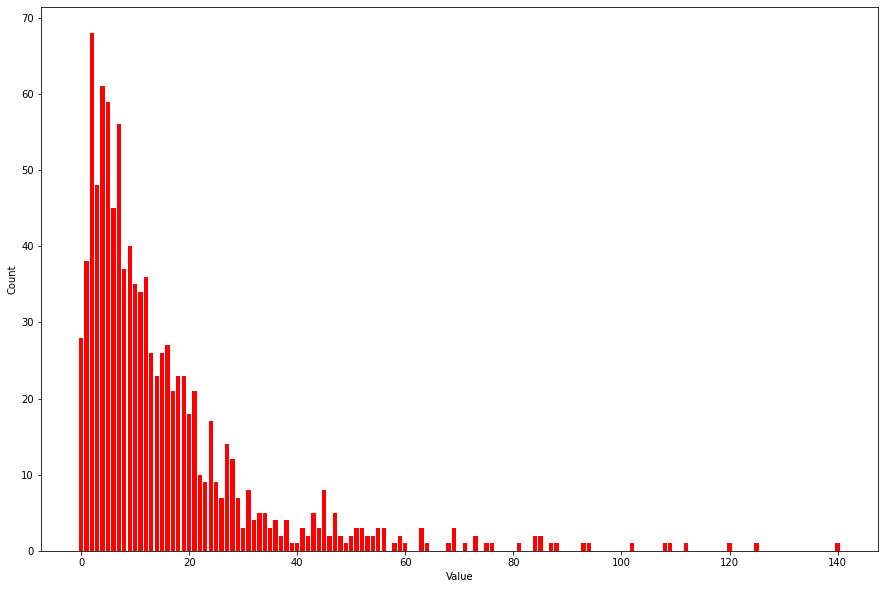

In [54]:
plt.figure(figsize=(15,10))
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='r')
plt.xlabel('Value')
plt.ylabel('Count')

In [56]:
from sklearn.linear_model import Ridge

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [58]:
rid = Ridge().fit(X_train,y_train)
rid.score(X_test,y_test)

0.6224186236310756

In [59]:
X_train_log = np.log(X_train+1)
X_test_log =  np.log(X_test+1)

Text(0.5, 0, 'Value')

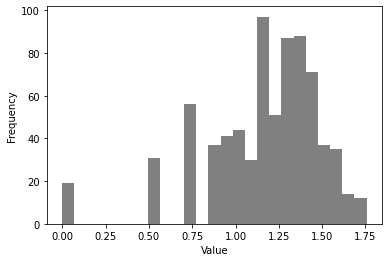

In [60]:
plt.hist(np.log(X_train_log[:,0]+1),bins=25,color='gray')
plt.ylabel('Frequency')
plt.xlabel('Value')

In [61]:
rid_ = Ridge().fit(X_train_log,y_train)
rid_.score(X_test_log,y_test)

0.8749342372887815

# Univariate Statistics 

In [64]:
from sklearn.feature_selection import SelectPercentile
from sklearn.datasets import load_breast_cancer

In [65]:
cancer = load_breast_cancer()

In [69]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))

In [71]:
noise.shape

(569, 50)

In [72]:
cancer.data.shape

(569, 30)

In [73]:
X_nw = np.hstack([cancer.data,noise])

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X_nw,cancer.target,random_state=0,test_size=0.5)

In [75]:
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_trans = select.transform(X_train)

In [76]:
X_train.shape

(284, 80)

In [78]:
X_trans.shape

(284, 40)

In [93]:
X_test_ = select.transform(X_test)

In [80]:
mask = select.get_support()

[]

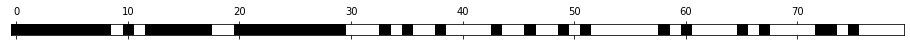

In [90]:
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
ax = plt.gca()
ax.set_yticks(())

In [95]:
from sklearn.linear_model import LogisticRegression

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
lreg = LogisticRegression()
print(lreg.fit(X_train,y_train).score(X_test,y_test))
print(lreg.fit(X_trans,y_train).score(X_test_,y_test))

0.9157894736842105
0.9192982456140351


In [100]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [101]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold='median')

In [102]:
select.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [103]:
X_train_l1 = select.transform(X_train)

In [104]:
X_train.shape

(284, 80)

In [105]:
X_train_l1.shape

(284, 40)

[]

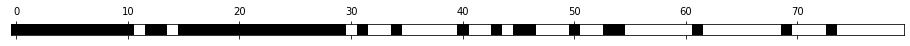

In [107]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
ax = plt.gca()
ax.set_yticks(())

In [108]:
X_test_l1 = select.transform(X_test)
lreg = LogisticRegression()
print(lreg.fit(X_train,y_train).score(X_test,y_test))
print(lreg.fit(X_train_l1,y_train).score(X_test_l1,y_test))

0.9157894736842105
0.9298245614035088


In [109]:
from sklearn.feature_selection import RFE

In [113]:
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=40)
select.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

In [114]:
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


[]

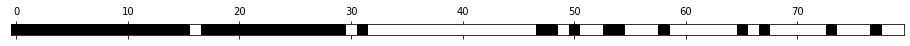

In [115]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
ax = plt.gca()
ax.set_yticks(())

In [116]:
X_test_l1 = select.transform(X_test)
lreg = LogisticRegression()
print(lreg.fit(X_train,y_train).score(X_test,y_test))
print(lreg.fit(X_train_l1,y_train).score(X_test_l1,y_test))

0.9157894736842105
0.9298245614035088


In [117]:
select.score(X_test,y_test)

0.9508771929824561

# Sample Usecase

In [118]:
citi = mglearn.datasets.load_citibike()

In [120]:
citi.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

Text(0.5, 0, 'Dates')

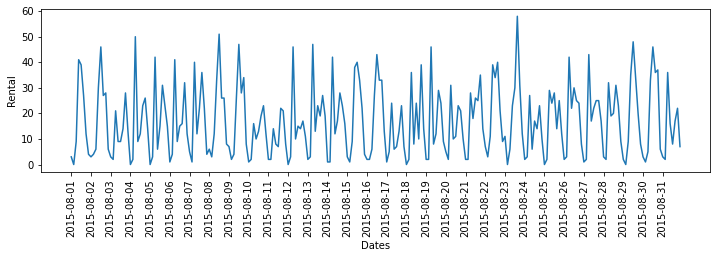

In [129]:
import pandas as pd
plt.figure(figsize=(12,3))
plt.plot(citi)
xticks = pd.date_range(start=citi.index.min(),end=citi.index.max(),freq='D')
plt.xticks(xticks,rotation=90)
plt.ylabel("Rental")
plt.xlabel('Dates')

In [130]:
y = citi.values

In [140]:
citi

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64

In [148]:
X = citi.index.strftime('%S').astype("int").reshape()